In [1]:
%load_ext autoreload
%autoreload 2
from visualize_dataset_new import plot_proposals_gt
from dataset import KITTIBEV, KITTICam
import torch
from torch.utils.data import DataLoader, Dataset

/home/ubuntu/anaconda3/envs/vlr/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
dataset = KITTICam(lidar_folder_name="./data/", 
                   valid_data_list_filename="./valid_full_list.txt")

Preloading Data


In [7]:
dataset[4515]['proposals'].shape

4515


torch.Size([32, 4])

In [3]:
dataloader = DataLoader(dataset, 1)
for data in dataloader:
    image = data['image']
    labels = data['labels']
    gt_boxes = data['gt_boxes']
    proposals = data['proposals']
    gt_class_list = data['gt_class_list']
    if proposals.shape[0] == 0:
        print("Hi")

In [2]:
from WSDNN_Resnet import WSDNN_Resnet
model = WSDNN_Resnet(num_class=2).cuda()

In [18]:
rois = torch.randn((100, 4)).cuda()
out = model(image.cuda(), rois)
print(out.shape)

torch.Size([100, 1, 2])


In [3]:
for param in model.encoder.paramaters():
    print(param)

AttributeError: 'Sequential' object has no attribute 'paramaters'

In [ ]:
valid_data_list_filename = "./valid_data_list_after_threshold.txt"
lidar_folder_name = "./data"

dataset = KITTIBEV(valid_data_list_filename=valid_data_list_filename, 
                   lidar_folder_name=lidar_folder_name)
dataloader = DataLoader(dataset, batch_size=1, num_workers=0)



In [ ]:
for data in da

000000 (1, 4) (1,) (272, 4)
gt:  (1, 4)
proposal:  (272, 4)
pc_feature:  torch.Size([36, 400, 350])


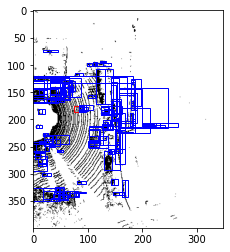

000003 (1, 4) (1,) (232, 4)
gt:  (1, 4)
proposal:  (232, 4)
pc_feature:  torch.Size([36, 400, 350])


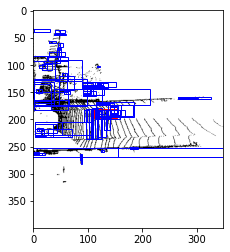

000005 (1, 4) (1,) (200, 4)
gt:  (1, 4)
proposal:  (200, 4)
pc_feature:  torch.Size([36, 400, 350])


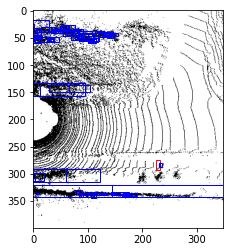

000006 (2, 4) (2,) (224, 4)
gt:  (2, 4)
proposal:  (224, 4)
pc_feature:  torch.Size([36, 400, 350])


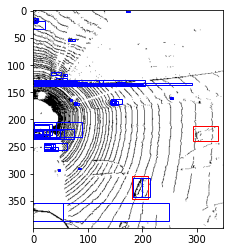

000007 (2, 4) (2,) (216, 4)
gt:  (2, 4)
proposal:  (216, 4)
pc_feature:  torch.Size([36, 400, 350])


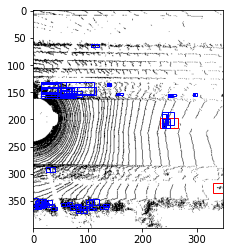

000008 (6, 4) (6,) (270, 4)
gt:  (6, 4)
proposal:  (270, 4)
pc_feature:  torch.Size([36, 400, 350])


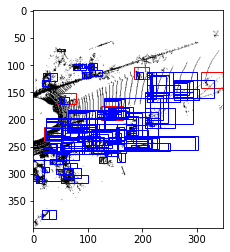

000009 (1, 4) (1,) (176, 4)
gt:  (1, 4)
proposal:  (176, 4)
pc_feature:  torch.Size([36, 400, 350])


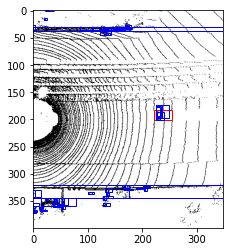

000010 (8, 4) (8,) (230, 4)
gt:  (8, 4)
proposal:  (230, 4)
pc_feature:  torch.Size([36, 400, 350])


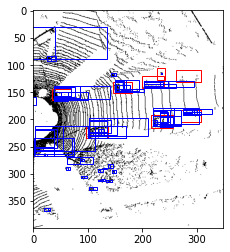

000011 (6, 4) (6,) (222, 4)
gt:  (6, 4)
proposal:  (222, 4)
pc_feature:  torch.Size([36, 400, 350])


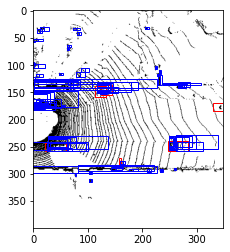

000013 (1, 4) (1,) (220, 4)
gt:  (1, 4)
proposal:  (220, 4)
pc_feature:  torch.Size([36, 400, 350])


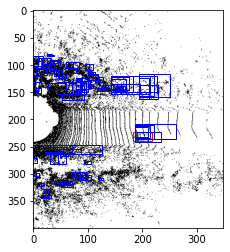

000015 (5, 4) (5,) (308, 4)
gt:  (5, 4)
proposal:  (308, 4)
pc_feature:  torch.Size([36, 400, 350])


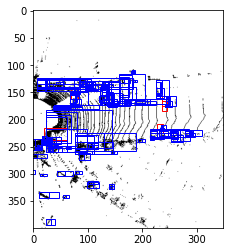

000019 (3, 4) (3,) (196, 4)
gt:  (3, 4)
proposal:  (196, 4)
pc_feature:  torch.Size([36, 400, 350])


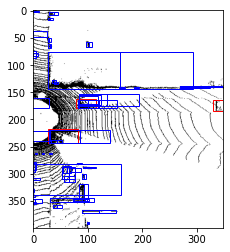

000021 (8, 4) (8,) (228, 4)
gt:  (8, 4)
proposal:  (228, 4)
pc_feature:  torch.Size([36, 400, 350])


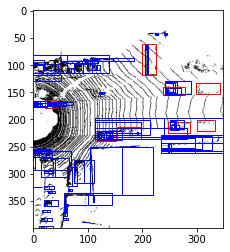

000022 (1, 4) (1,) (202, 4)
gt:  (1, 4)
proposal:  (202, 4)
pc_feature:  torch.Size([36, 400, 350])


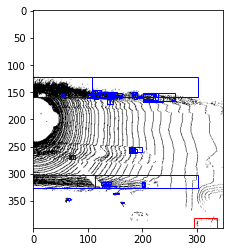

000025 (5, 4) (5,) (260, 4)
gt:  (5, 4)
proposal:  (260, 4)
pc_feature:  torch.Size([36, 400, 350])


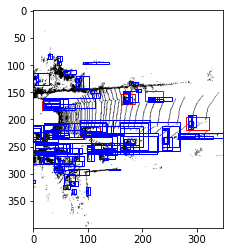

000027 (1, 4) (1,) (208, 4)
gt:  (1, 4)
proposal:  (208, 4)
pc_feature:  torch.Size([36, 400, 350])


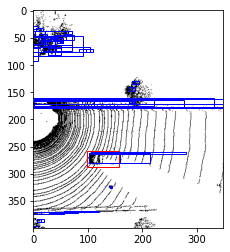

000028 (1, 4) (1,) (264, 4)
gt:  (1, 4)
proposal:  (264, 4)
pc_feature:  torch.Size([36, 400, 350])


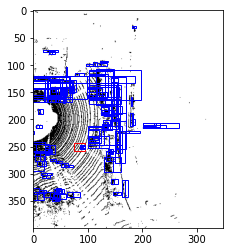

000031 (5, 4) (5,) (252, 4)
gt:  (5, 4)
proposal:  (252, 4)
pc_feature:  torch.Size([36, 400, 350])


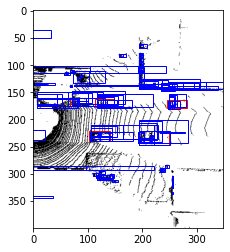

000032 (7, 4) (7,) (232, 4)
gt:  (7, 4)
proposal:  (232, 4)
pc_feature:  torch.Size([36, 400, 350])


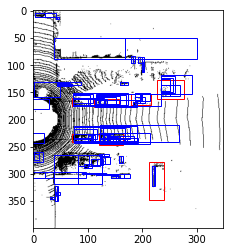

000033 (1, 4) (1,) (170, 4)
gt:  (1, 4)
proposal:  (170, 4)
pc_feature:  torch.Size([36, 400, 350])


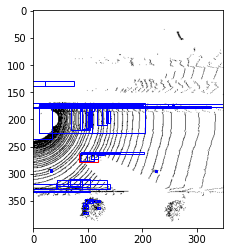

In [3]:
import numpy as np
dataloader = DataLoader(dataset, batch_size=1, num_workers=0)

i = 0
for data in dataloader:
    # if i <= 10:
    #     i += 1 
    #     continue
    bev = data['bev']
    #labels = data['labels']
    gt_boxes = data['gt_boxes'].squeeze(0)
    proposals = data['proposals'].squeeze(0)
    #proposals = torch.cuda.FloatTensor(proposals)
    #gt_class_list = data['gt_class_list'].cuda()
    gt_boxes = gt_boxes.cpu().detach().numpy()
    proposals = proposals.cpu().detach().numpy()
    # proposals[:, 0] = 200 - proposals[:, 0]
    # proposals[:, 2] = 200 - proposals[:, 2]
    #print(gt_boxes.shape, proposals.shape)
    if gt_boxes.shape[0] == 0:
        print("hi")
    plot_proposals_gt(gt_boxes.astype(np.int32), proposals.astype(np.int32), bev[0])
    i += 1
    #break
    if i >= 20:
        break

In [3]:
import numpy as np
dataloader = DataLoader(dataset, batch_size=1)
i = 0
for data in dataloader:
    # if i <= 10:
    #     i += 1 
    #     continue
    bev = data['bev']
    #labels = data['labels']
    gt_boxes = data['gt_boxes'].squeeze(0)
    proposals = data['proposals'].squeeze(0)
    #proposals = torch.cuda.FloatTensor(proposals)
    #gt_class_list = data['gt_class_list'].cuda()
    gt_boxes = gt_boxes.cpu().detach().numpy()
    proposals = proposals.cpu().detach().numpy()
    # proposals[:, 0] = 800 - proposals[:, 0]
    # proposals[:, 2] = 800 - proposals[:, 2]
    # print(gt_boxes.shape, proposals.shape)
    # plot_proposals_gt(gt_boxes.astype(np.int32), proposals.astype(np.int32), bev[0])
    i += 1
    break
    if i >= 20:
        break

Error: Canceled future for execute_request message before replies were done

In [1]:
import numpy as np


In [2]:
x = np.asarray([1, 2, 3])
x[0] = np.where(x[0] >= 2, 2, x[0]-1)
x

array([0, 2, 3])

In [2]:
import torchvision, torch

/home/akshay/anaconda3/envs/pixor/lib/python3.5/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
model = torchvision.models.resnet101(pretrained=True)
newmodel = torch.nn.Sequential(*(list(model.children())[:-1]))
model = newmodel.cuda()

In [16]:
x = torch.randn((1, 3, 1224, 370)).cuda()
with torch.no_grad():
    y = model(x)
    print(y.shape)

torch.Size([1, 2048, 1, 1])


In [1]:
!pip uninstall -y opencv-contrib-python

Found existing installation: opencv-contrib-python 4.5.4.58
Uninstalling opencv-contrib-python-4.5.4.58:
  Successfully uninstalled opencv-contrib-python-4.5.4.58


In [6]:
import os 
with open("valid_full_list.txt", "w") as f:
    for filename in os.listdir("/media/akshay/Data/KITTI/training/calib/"):
        print(filename)
        f.write(filename[:-4] + "\n")

000000.txt
000001.txt
000002.txt
000003.txt
000004.txt
000005.txt
000006.txt
000007.txt
000008.txt
000009.txt
000010.txt
000011.txt
000012.txt
000013.txt
000014.txt
000015.txt
000016.txt
000017.txt
000018.txt
000020.txt
000021.txt
000022.txt
000023.txt
000024.txt
000025.txt
000026.txt
000027.txt
000028.txt
000029.txt
000030.txt
000031.txt
000032.txt
000033.txt
000034.txt
000035.txt
000036.txt
000037.txt
000038.txt
000040.txt
000041.txt
000042.txt
000043.txt
000044.txt
000045.txt
000046.txt
000047.txt
000048.txt
000049.txt
000050.txt
000051.txt
000052.txt
000053.txt
000054.txt
000055.txt
000056.txt
000057.txt
000058.txt
000060.txt
000061.txt
000062.txt
000063.txt
000064.txt
000065.txt
000066.txt
000067.txt
000068.txt
000069.txt
000070.txt
000071.txt
000072.txt
000073.txt
000074.txt
000075.txt
000076.txt
000077.txt
000078.txt
000080.txt
000081.txt
000082.txt
000083.txt
000084.txt
000085.txt
000086.txt
000087.txt
000088.txt
000089.txt
000090.txt
000091.txt
000092.txt
000093.txt
000094.txt

In [7]:
with open("valid_full_list.txt", "r") as f:
    for filename in f.readlines():
        print(filename)

000000

000001

000002

000003

000004

000005

000006

000007

000008

000009

000010

000011

000012

000013

000014

000015

000016

000017

000018

000020

000021

000022

000023

000024

000025

000026

000027

000028

000029

000030

000031

000032

000033

000034

000035

000036

000037

000038

000040

000041

000042

000043

000044

000045

000046

000047

000048

000049

000050

000051

000052

000053

000054

000055

000056

000057

000058

000060

000061

000062

000063

000064

000065

000066

000067

000068

000069

000070

000071

000072

000073

000074

000075

000076

000077

000078

000080

000081

000082

000083

000084

000085

000086

000087

000088

000089

000090

000091

000092

000093

000094

000095

000096

000097

000098

000019

000039

000059

000079

000099

000119

000139

000159

000179

000199

000219

000239

000259

000279

000299

000319

000339

000100

000101

000102

000103

000104

000105

000106

000107

000108

000109

000110

000111

000112



In [ ]:
from dataset import KITTICam
dataset = KITTICam()